# Libraries

In [223]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, \
ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.naive_bayes import ComplementNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier

# Linear Regression

In [45]:
# Vytvorte dataframe s názvom pr, ktorý bude obsahovať stĺpce poc_rokov (hodnoty 4,
# 7, 9, 12, 3, 5, 11, 21, 1, 14) a prijem (hodnoty 32, 54, 64, 70, 36, 41, 59, 90, 20, 79)

pr = pd.DataFrame(
    {
        "poc_rokov": [4, 7, 9, 12, 3, 5, 11, 21, 1, 14],
        "prijem" : [32, 54, 64, 70, 36, 41, 59, 90, 20, 79]
    }
)

print(pr)
print(pr.info())

   poc_rokov  prijem
0          4      32
1          7      54
2          9      64
3         12      70
4          3      36
5          5      41
6         11      59
7         21      90
8          1      20
9         14      79
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   poc_rokov  10 non-null     int64
 1   prijem     10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes
None


In [46]:
# Vytvorte model lineárnej regresie s názvom model, ktorý bude predikovať hodnotu
# atribútu prijem v závislosti od atribútu poc_rokov z dát pr.

X = np.array(pr['poc_rokov']).reshape(-1, 1) 
y = np.array(pr['prijem']).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [47]:
'''
Pridajte do dát pr nový atribút s názvom predicted, ktorý bude obsahovať predikované
hodnoty získané pomocou vytvoreného lineárneho modelu. Porovnajte reálne hodnoty
(Príjem) s predikovanými hodnotami (predicted). 
'''

# Predict  
pr['predicted'] = model.predict(X)
y_pred = pr['predicted']
print(pr)


# Calculate evalluation metrics and print the metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

   poc_rokov  prijem  predicted
0          4      32  37.802821
1          7      54  48.460595
2          9      64  55.565777
3         12      70  66.223551
4          3      36  34.250230
5          5      41  41.355412
6         11      59  62.670960
7         21      90  98.196872
8          1      20  27.145048
9         14      79  73.328734
MAE: 5.034222631094758
MSE: 31.68230604109171
RMSE: 5.628703762065624


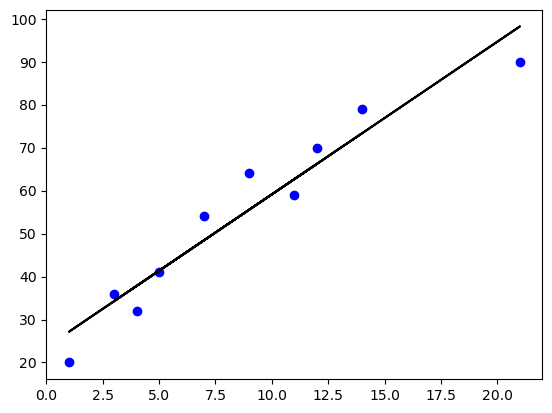

In [48]:
# Zobrazte graf pôvodných hodnôt (ako bodový graf) spolu s priamkou vytvoreného 
# modelu lineárnej regresie predikovaných hodnôt

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='black')
plt.show()

In [49]:
# Vytvorte nový dataframe s názvom pr1, ktorý bude obsahovať len stĺpec poc_rokov s hodnotami 10,15 a 20.

pr1 = pd.DataFrame(
    {
        "poc_rokov": [10, 15, 20]
    }
)

print(pr1)

   poc_rokov
0         10
1         15
2         20


In [50]:
# Pridajte do dát pr1 nový atribút s názvom prijem, ktorý bude obsahovať predikované
# hodnoty pomocou modelu pre počet rokov praxe 10, 15 a 20.

X = np.array(pr1['poc_rokov']).reshape(-1, 1)
pr1['prijem'] = model.predict(X)

print(pr1)

   poc_rokov     prijem
0         10  59.118369
1         15  76.881325
2         20  94.644281


# Multiple regression

In [89]:
# Načítajte dáta o jednotlivých štátoch v USA do dataframu s názvom state (k dispozícii
# máte dáta napr. v csv súbore na adrese https://peter.butka.website.tuke.sk/res/state.csv)

state = pd.read_csv('https://peter.butka.website.tuke.sk/res/state.csv')

In [90]:
state.head(5)

,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


In [91]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Population  50 non-null     int64  
 2   Income      50 non-null     int64  
 3   Illiteracy  50 non-null     float64
 4   Life.Exp    50 non-null     float64
 5   Murder      50 non-null     float64
 6   HS.Grad     50 non-null     float64
 7   Frost       50 non-null     int64  
 8   Area        50 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.6+ KB


In [95]:
"""
Rozdeľte si množinu na trénovaciu časť (state-train) a testovaciu (state-test), ideálne
tak že si vyberiete niekoľko štátov pre testovanie (napr. 5) a všetky ostatné na
trénovanie
"""

# Create random state for our dataset
state_shuffled = state.sample(frac=1, random_state=42).reset_index(drop=True)

state_train = state_shuffled.loc[5:, ['Illiteracy', 'Life.Exp', 'Murder']]
state_test = state_shuffled.loc[:5, ['Illiteracy', 'Life.Exp', 'Murder']]


# state_train = pd.concat(
#     [
#         state_shuffled['Illiteracy'][5:],  
#         state_shuffled['Life.Exp'][5:], 
#         state_shuffled['Murder'][5:]
#     ], axis=1
# )

# state_test = pd.concat(
#     [
#         state_shuffled['Illiteracy'][:5], 
#         state_shuffled['Life.Exp'][:5], 
#         state_shuffled['Murder'][:5]
#     ], axis=1
# )


# Split dataset via train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
state_train.head(10)

,Illiteracy,Life.Exp,Murder
5,0.7,72.48,3.0
6,0.6,72.60,2.9
7,0.6,70.56,5.0
8,1.8,69.21,11.1
9,0.9,70.22,8.5
10,0.9,70.14,10.3
11,1.1,71.71,10.3
12,1.0,70.43,6.1
13,1.3,70.66,10.7
14,1.9,70.66,10.1


In [97]:
state_test.head()

,Illiteracy,Life.Exp,Murder
0,0.7,70.88,7.1
1,2.3,67.96,11.6
2,2.2,70.32,9.7
3,1.4,70.08,9.5
4,2.8,68.76,13.2


In [98]:
"""
Pridajte do dát state-test nový atribút s názvom Murder_predict, ktorý bude
obsahovať predikované hodnoty Murder pre štáty v testovacej množine získané
pomocou vytvoreného modelu model2.

Vytvorte model s názvom model2, ktorý bude predikovať hodnotu numerického atribútu Murder, 
v závislosti od atribútov Illiteracy a Life.Exp s použitím dát statetrain
"""

# Split the data into training sets:
X_train = np.array(state_train['Illiteracy'], state_train['Life.Exp']).reshape(-1, 1)  
y_train = np.array(state_train['Murder']).reshape(-1, 1)

# Initialize the model and make fit method
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Split the data into testing sets:
X_test = np.array(state_test['Illiteracy'], state_test['Life.Exp']).reshape(-1, 1)
y_test = np.array(state_test['Murder']).reshape(-1, 1)

# Predict 
y_pred = model2.predict(X_test)
state_test['Murder_predict'] = y_pred

In [99]:
state_test.head(5)

,Illiteracy,Life.Exp,Murder,Murder_predict
0,0.7,70.88,7.1,5.235446
1,2.3,67.96,11.6,12.708621
2,2.2,70.32,9.7,12.241548
3,1.4,70.08,9.5,8.504960
4,2.8,68.76,13.2,15.043988


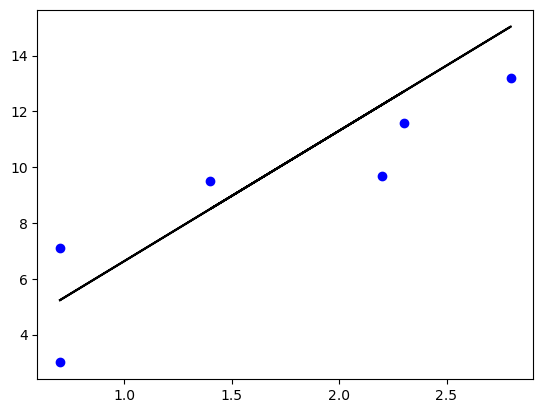

In [100]:
# Plot the result
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='black')
plt.show()

In [101]:
"""
Vypočítajte hodnoty metrík pre testovacie dáta v state-test, napr. MAE – Mean
Absolute Error, MSE – Mean Squared Error, RMSE - Root Mean Squared Error (nájdite
si ako sú definované, zvoľte implementácie vo vhodných balíkoch alebo vypočítajte
vlastnou implementáciou)
"""

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 1.7648660907633056
MSE: 3.425446936672366
RMSE: 1.8507962979950996


# Decision-making tree

In [197]:
# Načítajte dáta CO2 do dataframu s názvom CO2 (k dispozícii máte dáta aj v csv súbore
# na adrese https://peter.butka.website.tuke.sk/res/CO2.csv)

co2 = pd.read_csv('https://peter.butka.website.tuke.sk/res/CO2.csv')

In [198]:
# Vymažte z dát CO2 atribút s názvom Plant.
del co2['Plant']

# co2 = co2.drop(columns=['Plant'])

In [199]:
co2.head(10)

,Unnamed: 0,Type,Treatment,conc,uptake
0,1,Quebec,nonchilled,95,16.0
1,2,Quebec,nonchilled,175,30.4
2,3,Quebec,nonchilled,250,34.8
3,4,Quebec,nonchilled,350,37.2
4,5,Quebec,nonchilled,500,35.3
5,6,Quebec,nonchilled,675,39.2
6,7,Quebec,nonchilled,1000,39.7
7,8,Quebec,nonchilled,95,13.6
8,9,Quebec,nonchilled,175,27.3
9,10,Quebec,nonchilled,250,37.1


In [200]:
co2['Treatment'].nunique()

2

In [201]:
# Rozdeľte dáta CO2 do trénovacej (train_data) a testovacej množiny (test_data) v pomere 70 ku 30

# Convert atribuutes into numeric codes
co2_conv = co2
co2_conv['Type'] = co2['Type'].astype('category').cat.codes
co2_conv['Treatment'] = co2['Treatment'].astype('category').cat.codes

X = co2_conv[['Type', 'conc', 'uptake']]
y = co2_conv['Treatment']

# print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
X.head(5)

,Type,conc,uptake
0,1,95,16.0
1,1,175,30.4
2,1,250,34.8
3,1,350,37.2
4,1,500,35.3


In [203]:
# Vytvorte rozhodovací strom s názvom co2_tree z trénovacej množiny, ktorý bude
# obsahovať predikovať atribút Treatment v závislosti od všetkých ostatných atribútov.

co2_tree = tree.DecisionTreeClassifier()
co2_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [204]:
# Vypíšte vytvorený rozhodovací strom v slovnej podobe.
tree_rules = export_text(co2_tree, feature_names=list(X.columns))
print(tree_rules)

|--- uptake <= 21.95
|   |--- conc <= 212.50
|   |   |--- uptake <= 10.95
|   |   |   |--- class: 0
|   |   |--- uptake >  10.95
|   |   |   |--- conc <= 135.00
|   |   |   |   |--- uptake <= 13.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- uptake >  13.90
|   |   |   |   |   |--- uptake <= 15.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- uptake >  15.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- conc >  135.00
|   |   |   |   |--- uptake <= 18.60
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- uptake >  18.60
|   |   |   |   |   |--- Type <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Type >  0.50
|   |   |   |   |   |   |--- class: 0
|   |--- conc >  212.50
|   |   |--- class: 0
|--- uptake >  21.95
|   |--- Type <= 0.50
|   |   |--- class: 1
|   |--- Type >  0.50
|   |   |--- uptake <= 39.00
|   |   |   |--- conc <= 212.50
|   |   |   |   |--- uptake <= 28.85
|   |   |   |   |   |--- class: 0
|   |   |   |   

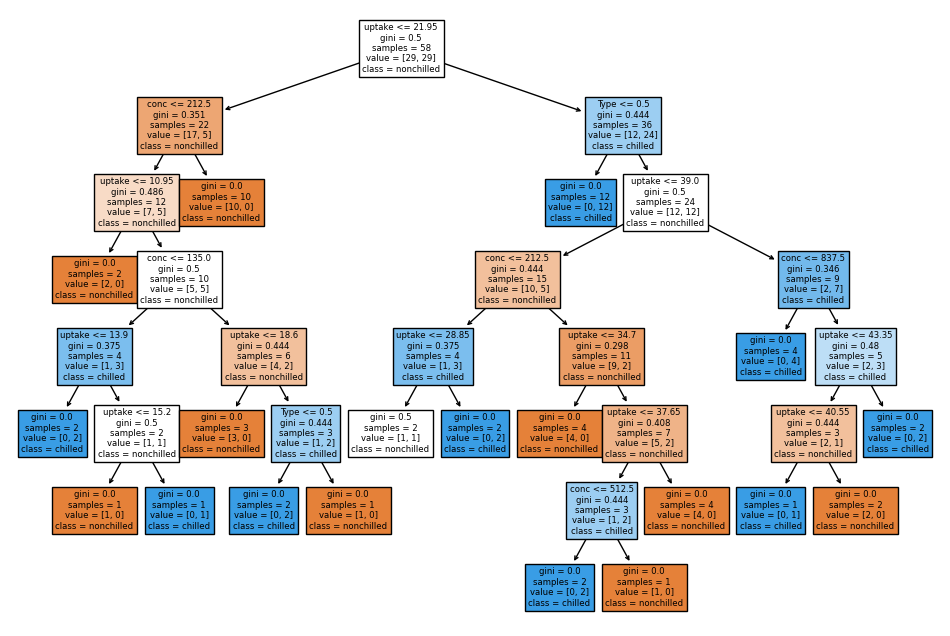

In [205]:
# Vykreslite rozhodovací strom aj v grafickej podobe.
plt.figure(figsize=(12, 8))
plot_tree(co2_tree, feature_names=X.columns, class_names=['nonchilled', 'chilled'], filled=True)
plt.show()

In [206]:
# Vytvorte premennú testPred_tree, ktorá bude obsahovať predikované hodnoty 
# pomocou testovacích dát (test_data).
testPred_tree = co2_tree.predict(X_test)

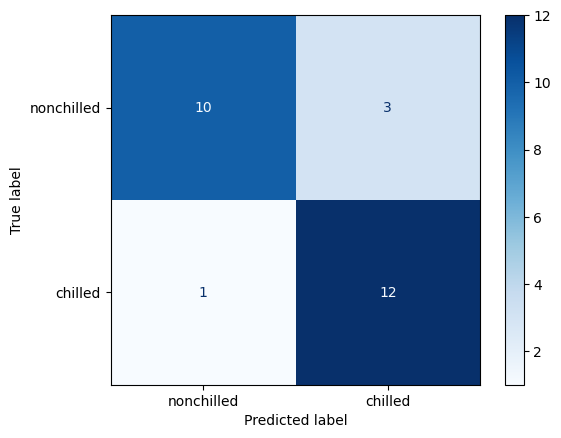

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.80      0.92      0.86        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



In [207]:
"""
Použitím kontingenčnej tabuľky (vždy sa tým myslí confusion matrix) porovnajte
predikované hodnoty (testPred_tree) získané pomocou rozhodovacieho stromu
a reálne hodnoty z testovacej množiny (test_data), kontingenčnú tabuľku uložte do
premennej tbl. Vypočítajte následne úspešnosť, presnosť, návratnosť a F1-skóre z
testovania rozhodovacieho stromu. (Pomôcka: môžete si určiť hodnoty priamo
výpočtom z confusion matrix alebo použiť existujúce balíky a funkcie, vhodný
komplexný výpis poskytujú - Python: classification_report v scikit-learn, R:
confusionMatrix funkcia balíka caret s nastavením mode = “prec_recall”).
"""
tbl = ConfusionMatrixDisplay.from_estimator(co2_tree, X_test, y_test, display_labels=['nonchilled', 'chilled'], cmap='Blues')
plt.show()

print(classification_report(y_test, testPred_tree))

# Naive Bayesian Classifier

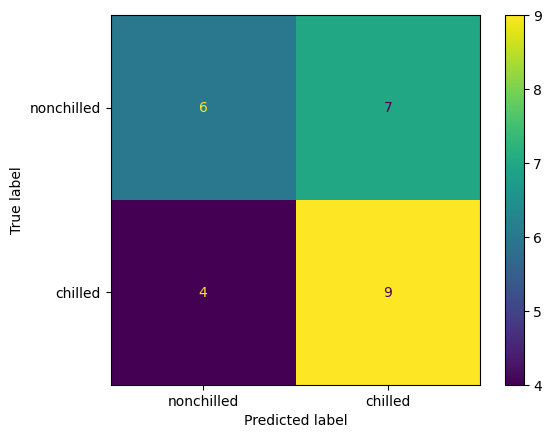

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



In [214]:
"""
- Ako vstup použite rovnaké rozdelenie dát na trénovaciu a testovaciu časť ako v
predchádzajúcej úlohe.

- Pomocou pravdepodobnostného prístupu (Naivný Bayesovský klasifikátor) klasifikujte
záznamy z dát CO2 do tried cieľového atribútu Treatment. Berte do úvahy len stĺpce
conc a uptake a dosiahnuté výsledky na testovacej množine vypíšte vo forme
kontingenčnej tabuľky, vypíšte aj úspešnosť, presnosť, návratnosť a F1-skóre.
"""

X = co2_conv[['conc', 'uptake']]
y = co2_conv['Treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = ComplementNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['nonchilled', 'chilled'])
plt.show()
print(classification_report(y_test, y_pred))

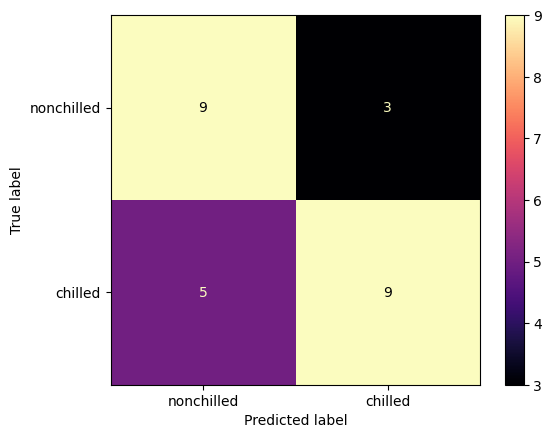

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.75      0.64      0.69        14

    accuracy                           0.69        26
   macro avg       0.70      0.70      0.69        26
weighted avg       0.70      0.69      0.69        26



In [220]:
"""
Pomocou pravdepodobnostného prístupu (Naivný Bayesovský klasifikátor) klasifikujte
záznamy z dát CO2 do tried cieľového atribútu Type. Berte do úvahy len stĺpce conc
a uptake a dosiahnuté výsledky na testovacej množine vypíšte vo forme kontingenčnej
tabuľky (vypíšte aj úspešnosť, presnosť, návratnosť a F1-skóre), tentokrát ale navrhnite
diskretizáciu vstupných atribútov a použite tieto pre klasifikáciu.
"""

# Function for discretize features
def discretize_features(df, columns, bins=5):
    for col in columns:
        df[col] = pd.cut(df[col], bins=bins, labels=False)
    return df

co2_discrete = discretize_features(co2.copy(), ['conc', 'uptake'], bins=5)

X = co2_discrete[['conc', 'uptake']]
y = co2_discrete['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = CategoricalNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['nonchilled', 'chilled'], cmap='magma')
plt.show()
print(classification_report(y_test, y_pred))

# KNN

In [236]:
"""
- Rozdeľte dáta CO2 na trénovaciu a testovaciu množinu v pomere 80 ku 20 tak, že
vzniknú dataframy s názvami co2_training a co2_test, ktoré budú obsahovať iba
(pôvodné, nie diskretizované) atribúty conc a uptake.

- Vytvorte vektory s názvami co2_trainLabels a co2_testLabels, ktoré budú obsahovať
iba hodnotu cieľového atribútu Treatment z trénovacej, resp. testovacej množiny.
"""

X = co2[['conc', 'uptake']]
y = co2['Treatment'].astype('category').cat.codes

co2_training, co2_test, co2_trainLabels, co2_testLabels = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Do premennej s názvom co2_pred uložte získané hodnoty pomocou metódy knajbližších susedov, 
# pričom použite funkciu knn a vstupný atribút k nastavte na hodnotu 2.
n = 2
neigh = KNeighborsClassifier(n_neighbors=n)
neigh.fit(co2_training, co2_trainLabels)

co2_pred = neigh.predict(co2_test)

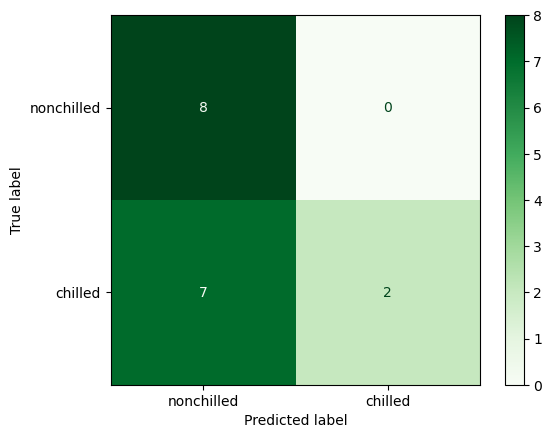

              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       1.00      0.22      0.36         9

    accuracy                           0.59        17
   macro avg       0.77      0.61      0.53        17
weighted avg       0.78      0.59      0.52        17



In [238]:
"""
Získané výsledky (co2_pred) porovnajte s hodnotami uloženými vo vektore
co2_testLables, vypíšte kontingenčnú tabuľku, ako aj úspešnosť, presnosť, návratnosť
a F1-skóre klasifikácie.
"""

ConfusionMatrixDisplay.from_predictions(co2_testLabels, co2_pred, display_labels=['nonchilled', 'chilled'], cmap='Greens')
plt.show()
print(classification_report(co2_testLabels, co2_pred))